In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
details = pd.read_csv("patient_icu_ward_stay_list_deid.csv", sep=',')
details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
0,ZI0001,07/10/1999,NaN,Male,1,28/04/2016 11:15,29/04/2016 12:15,NaN,NaN,1,1.0,28/04/2016 19:00,5.0,NaN,PICU
1,ZI0001,07/10/1999,NaN,Male,2,07/05/2016 13:43,08/05/2016 15:25,NaN,NaN,1,1.0,07/05/2016 17:00,3.0,NaN,PICU
2,XY0002,09/06/1998,NaN,Male,1,07/01/2016 16:20,09/01/2016 16:22,NaN,NaN,1,1.0,07/01/2016 18:00,5.0,NaN,PICU
3,DX0003,04/11/1998,NaN,Female,1,24/06/2016 18:05,25/06/2016 16:22,NaN,NaN,1,1.0,25/06/2016 01:00,5.0,NaN,FLAMI
4,FK0004,09/03/1999,NaN,Female,1,03/03/2017 15:04,20/03/2017 14:17,1.0,04/03/2017 14:45,1,1.0,11/03/2017 15:00,1.0,04/03/2017 15:00,FLAMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5652,SR4116,11/01/2018,NaN,Male,1,29/12/2018 21:35,31/12/2018 12:54,NaN,NaN,1,1.0,31/12/2018 00:00,5.0,NaN,PICU
5653,HK4117,28/12/2018,NaN,Male,1,28/12/2018 08:20,01/01/2019 13:15,NaN,NaN,1,1.0,28/12/2018 18:00,5.0,NaN,NICU
5654,TI4118,11/09/2016,NaN,Male,1,26/12/2018 21:20,08/01/2019 12:51,NaN,NaN,1,1.0,03/01/2019 12:00,5.0,NaN,PICU
5655,KI4119,13/05/2016,NaN,Female,1,30/12/2018 22:42,31/12/2018 16:39,NaN,NaN,0,0.0,NaN,NaN,NaN,PICU


In [4]:
details['extubation_deid_date'] = pd.to_datetime(details['extubation_deid_date'], format='%d/%m/%Y %H:%M')
details['failed_extubation_deid_date'] = pd.to_datetime(details['failed_extubation_deid_date'], format='%d/%m/%Y %H:%M')
details['re_intubation_deid_date'] = pd.to_datetime(details['re_intubation_deid_date'], format='%d/%m/%Y %H:%M')
details['death_deid_date'] = pd.to_datetime(details['death_deid_date'], format='%d/%m/%Y')
details['icu_start_deid_dttm'] = pd.to_datetime(details['icu_start_deid_dttm'], format='%d/%m/%Y %H:%M')
details['icu_end_deid_dttm'] = pd.to_datetime(details['icu_end_deid_dttm'], format='%d/%m/%Y %H:%M')
details['birth_deid_date'] = pd.to_datetime(details['birth_deid_date'], format='%d/%m/%Y')
details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI
4,FK0004,1999-03-09,NaT,Female,1,2017-03-03 15:04:00,2017-03-20 14:17:00,1.0,2017-03-04 14:45:00,1,1.0,2017-03-11 15:00:00,1.0,2017-03-04 15:00:00,FLAMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU
5655,KI4119,2016-05-13,NaT,Female,1,2018-12-30 22:42:00,2018-12-31 16:39:00,NaN,NaT,0,0.0,NaT,NaN,NaT,PICU


In [5]:
cohort_1_details = details[pd.isnull(details["failed_extubation_deid_date"]) == False]
cohort_2_details_temp = details[(details["failed_extubation_flag"] != 1.0)]
cohort_2_details = cohort_2_details_temp[pd.isnull(cohort_2_details_temp["death_deid_date"]) == True]
cohort_3_details_temp = details[pd.isnull(details["death_deid_date"]) == False]
cohort_3_details = cohort_3_details_temp[pd.isnull(cohort_3_details_temp["failed_extubation_deid_date"]) == True]
cohort_2_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU
5655,KI4119,2016-05-13,NaT,Female,1,2018-12-30 22:42:00,2018-12-31 16:39:00,NaN,NaT,0,0.0,NaT,NaN,NaT,PICU


### Note: 38 patients in cohort 1 who died AFTER a failed extubation, do we assume that the failed extubation time is a mistake or keep them in?

In [6]:
cohort_1_details["extubation_duration"] = [((x - y).seconds)/60 for x, y in zip(cohort_1_details['re_intubation_deid_date'], cohort_1_details['failed_extubation_deid_date'])]
# cohort_1_details['extubation_duration'] = pd.to_timedelta64[m](cohort_1_details['extubation_duration'], format='%d/%m/%Y %H:%M')
cohort_1_details


/var/folders/rg/6x4tlzs16c76vmthv_nxc63r0000gn/T/ipykernel_14764/2766920972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_1_details["extubation_duration"] = [((x - y).seconds)/60 for x, y in zip(cohort_1_details['re_intubation_deid_date'], cohort_1_details['failed_extubation_deid_date'])]


,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,extubation_duration
4,FK0004,1999-03-09,NaT,Female,1,2017-03-03 15:04:00,2017-03-20 14:17:00,1.0,2017-03-04 14:45:00,1,1.0,2017-03-11 15:00:00,1.0,2017-03-04 15:00:00,FLAMI,15.0
75,NI0065,2002-02-19,NaT,Male,1,2017-08-15 11:15:00,2017-09-11 10:35:00,1.0,2017-08-20 11:00:00,1,1.0,2017-08-25 14:00:00,3.0,2018-08-20 11:30:00,PICU,30.0
85,KH0067,2003-01-22,NaT,Female,2,2016-10-13 22:30:00,2016-12-03 15:54:00,1.0,2016-10-16 10:30:00,1,1.0,2016-10-16 11:00:00,4.0,2016-10-16 16:30:00,PICU,360.0
95,ZE0077,2001-11-29,NaT,Male,1,2017-07-10 03:30:00,2017-07-31 12:08:00,1.0,2017-07-12 18:30:00,1,1.0,2017-07-18 13:00:00,5.0,2017-07-12 19:00:00,PICU,30.0
165,JJ0136,2001-06-12,NaT,Female,2,2016-06-22 02:00:00,2016-08-22 18:08:00,1.0,2016-07-05 12:15:00,1,1.0,2016-07-05 13:00:00,4.0,2016-07-05 17:00:00,FLAMI,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5484,PL3964,2018-09-29,NaT,Male,1,2018-10-10 17:30:00,2018-11-17 13:06:00,1.0,2018-10-22 15:00:00,1,1.0,2018-10-22 15:00:00,5.0,2018-10-23 06:00:00,NICU,900.0
5496,RD3976,2018-10-14,NaT,Male,1,2018-10-16 05:45:00,2018-10-23 19:09:00,1.0,2018-10-19 11:00:00,1,1.0,2018-10-19 11:00:00,5.0,2018-10-19 21:00:00,NICU,600.0
5517,JV3994,2018-10-16,2018-10-30,Female,1,2018-10-23 02:00:00,2018-10-30 13:45:00,1.0,2018-10-28 10:00:00,1,1.0,2018-10-28 10:00:00,5.0,2018-10-29 20:00:00,NICU,600.0
5565,TV4037,2018-09-28,NaT,Male,1,2018-12-12 20:00:00,2018-12-18 16:17:00,1.0,2018-12-13 11:50:00,1,1.0,2018-12-13 11:51:00,5.0,2018-11-14 10:00:00,PICU,1330.0


In [7]:
cohort_1_details["age (days)"] = [((x - y).seconds)/86400 for x, y in zip(cohort_1_details['failed_extubation_deid_date'], cohort_1_details['birth_deid_date'])]
# cohort_1_details['extubation_duration'] = pd.to_timedelta64[m](cohort_1_details['extubation_duration'], format='%d/%m/%Y %H:%M')
cohort_1_details

/var/folders/rg/6x4tlzs16c76vmthv_nxc63r0000gn/T/ipykernel_14764/1343252002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_1_details["age (days)"] = [((x - y).seconds)/86400 for x, y in zip(cohort_1_details['failed_extubation_deid_date'], cohort_1_details['birth_deid_date'])]


,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,extubation_duration,age (days)
4,FK0004,1999-03-09,NaT,Female,1,2017-03-03 15:04:00,2017-03-20 14:17:00,1.0,2017-03-04 14:45:00,1,1.0,2017-03-11 15:00:00,1.0,2017-03-04 15:00:00,FLAMI,15.0,0.614583
75,NI0065,2002-02-19,NaT,Male,1,2017-08-15 11:15:00,2017-09-11 10:35:00,1.0,2017-08-20 11:00:00,1,1.0,2017-08-25 14:00:00,3.0,2018-08-20 11:30:00,PICU,30.0,0.458333
85,KH0067,2003-01-22,NaT,Female,2,2016-10-13 22:30:00,2016-12-03 15:54:00,1.0,2016-10-16 10:30:00,1,1.0,2016-10-16 11:00:00,4.0,2016-10-16 16:30:00,PICU,360.0,0.437500
95,ZE0077,2001-11-29,NaT,Male,1,2017-07-10 03:30:00,2017-07-31 12:08:00,1.0,2017-07-12 18:30:00,1,1.0,2017-07-18 13:00:00,5.0,2017-07-12 19:00:00,PICU,30.0,0.770833
165,JJ0136,2001-06-12,NaT,Female,2,2016-06-22 02:00:00,2016-08-22 18:08:00,1.0,2016-07-05 12:15:00,1,1.0,2016-07-05 13:00:00,4.0,2016-07-05 17:00:00,FLAMI,285.0,0.510417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5484,PL3964,2018-09-29,NaT,Male,1,2018-10-10 17:30:00,2018-11-17 13:06:00,1.0,2018-10-22 15:00:00,1,1.0,2018-10-22 15:00:00,5.0,2018-10-23 06:00:00,NICU,900.0,0.625000
5496,RD3976,2018-10-14,NaT,Male,1,2018-10-16 05:45:00,2018-10-23 19:09:00,1.0,2018-10-19 11:00:00,1,1.0,2018-10-19 11:00:00,5.0,2018-10-19 21:00:00,NICU,600.0,0.458333
5517,JV3994,2018-10-16,2018-10-30,Female,1,2018-10-23 02:00:00,2018-10-30 13:45:00,1.0,2018-10-28 10:00:00,1,1.0,2018-10-28 10:00:00,5.0,2018-10-29 20:00:00,NICU,600.0,0.416667
5565,TV4037,2018-09-28,NaT,Male,1,2018-12-12 20:00:00,2018-12-18 16:17:00,1.0,2018-12-13 11:50:00,1,1.0,2018-12-13 11:51:00,5.0,2018-11-14 10:00:00,PICU,1330.0,0.493056


(array([0.00337812, 0.00176949, 0.00353898, 0.00112604, 0.00160863,
        0.00112604, 0.00289553, 0.00080431, 0.00112604, 0.00112604,
        0.00064345, 0.00048259, 0.00112604, 0.00048259, 0.00160863,
        0.00032173, 0.00064345, 0.        , 0.00048259, 0.00032173,
        0.00048259, 0.        , 0.00048259, 0.00016086, 0.00016086,
        0.00048259, 0.00032173, 0.00048259, 0.        , 0.00080431,
        0.00032173, 0.00016086, 0.00016086, 0.00032173, 0.        ,
        0.00064345, 0.        , 0.00048259, 0.00016086, 0.00080431,
        0.00016086, 0.00016086, 0.00048259, 0.00048259, 0.00032173,
        0.00064345, 0.00032173, 0.00032173, 0.00032173, 0.00048259]),
 array([   0.  ,   28.78,   57.56,   86.34,  115.12,  143.9 ,  172.68,
         201.46,  230.24,  259.02,  287.8 ,  316.58,  345.36,  374.14,
         402.92,  431.7 ,  460.48,  489.26,  518.04,  546.82,  575.6 ,
         604.38,  633.16,  661.94,  690.72,  719.5 ,  748.28,  777.06,
         805.84,  834.62,  863.4 ,

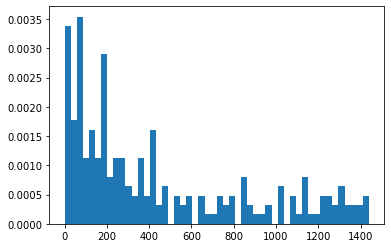

In [8]:
plt.hist(cohort_1_details['extubation_duration'], bins=50, density=True)

In [9]:
cohort_1_extubation_duration = pd.DataFrame(cohort_1_details['extubation_duration'])
cohort_1_extubation_duration = cohort_1_extubation_duration.sort_values(by='extubation_duration')
cohort_1_extubation_duration

,extubation_duration
946,0.0
1505,0.0
2359,0.0
5082,0.0
233,0.0
...,...
4934,1405.0
4330,1410.0
896,1428.0
2575,1430.0


In [10]:
extubation_time_quantiles = cohort_1_extubation_duration.quantile(q=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
extubation_time_quantiles


,extubation_duration
0.0,0.0
0.1,30.0
0.2,60.0
0.3,120.0
0.4,180.0
0.5,258.0
0.6,390.0
0.7,547.5
0.8,840.0
0.9,1182.5


Window of 30 means we throw away 20% of data

Window of 60 means we throw away 30% of data

Window of 90 means we throw away 40% of data

### Age

(array([0.49019608, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.49019608,
        0.        , 0.        , 0.        , 0.49019608, 0.        ,
        0.24509804, 0.24509804, 0.49019608, 0.49019608, 1.71568627,
        0.98039216, 0.98039216, 4.16666667, 2.20588235, 4.90196078,
        1.71568627, 2.20588235, 1.47058824, 3.43137255, 2.69607843,
        5.6372549 , 1.2254902 , 0.98039216, 4.16666667, 0.49019608,
        2.20588235, 0.73529412, 2.45098039, 0.98039216, 0.98039216,
        0.73529412, 0.49019608, 0.        , 0.        , 0.73529412,
        0.        , 0.24509804, 0.24509804, 0.49019608, 0.73529412]),
 array([0.04166667, 0.06055556, 0.07944444, 0.09833333, 0.11722222,
        0.13611111, 0.155     , 0.17388889, 0.19277778, 0.21166667,
        0.23055556, 0.24944444, 0.26833333, 0.28722222, 0.30611111,
        0.325     , 0.34388889, 0.36277778, 0.38166667, 0.40055556,
        0.41944444, 0.43833333, 0.45722222, 0.

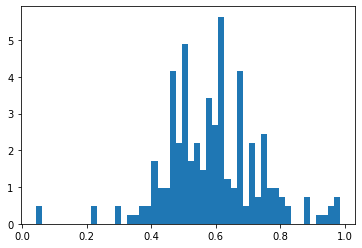

In [11]:
plt.hist(cohort_1_details['age (days)'], bins=50, density=True)

In [12]:
cohort_1_age = pd.DataFrame(cohort_1_details['age (days)'].quantile(q=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
cohort_2_age = pd.DataFrame(cohort_2_details['age (days)'].quantile(q=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
print(cohort_1_age, cohort_2_age)


KeyError: 'age (days)'

In [131]:
cohort_1_sex = pd.DataFrame(cohort_1_details['sex'].value_counts())
cohort_1_sex

,sex
Male,121
Female,95


In [132]:
cohort_1_monitor = pd.DataFrame(cohort_1_details['icu_ward'].value_counts())
cohort_1_monitor

,icu_ward
PICU,119
FLAMI,66
NICU,31
